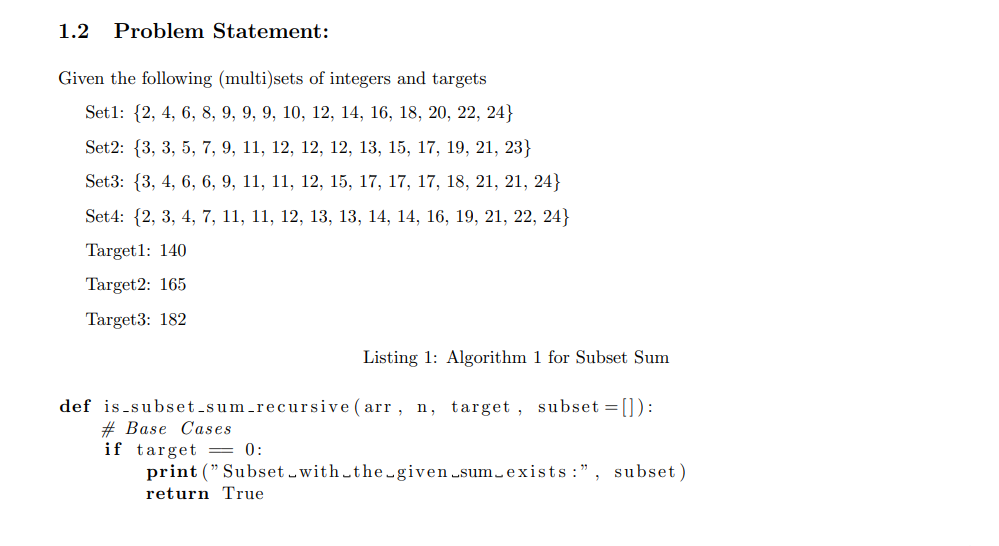

image.png

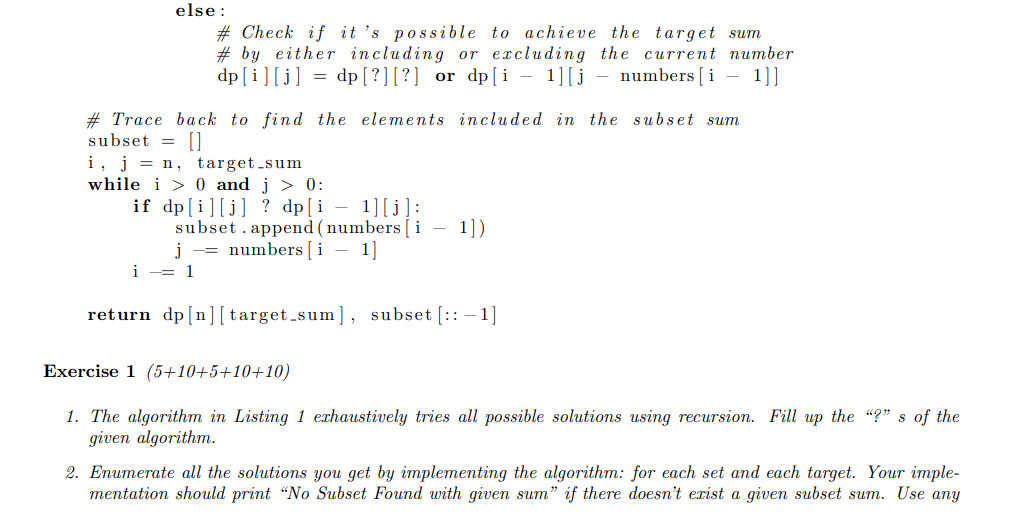

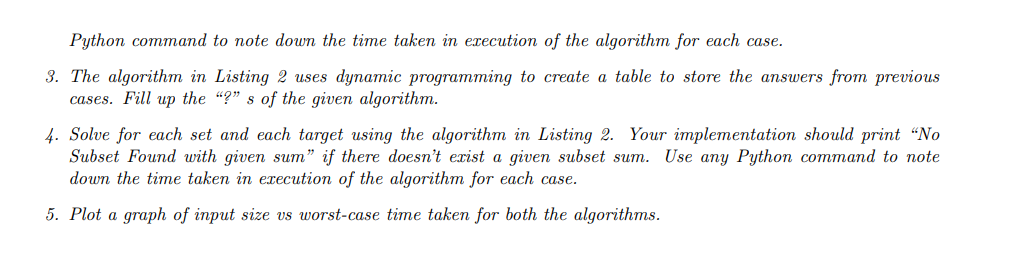

#Question 1.1

In [9]:
import time

def issubsetsumrecursive(arr, n, target, subset=[]):
    # Base Cases
    if target == 0:
        print("Subset with the given sum exists:", subset)
        return True
    if n == 0 and target != 0:
        return False
    # If last element is greater than target, ignore it
    if arr[n - 1] > target:
        return issubsetsumrecursive(arr, n - 1, target, subset)
    # Check if sum can be obtained by including the last element or excluding it
    return (issubsetsumrecursive(arr, n - 1, target, subset) or
            issubsetsumrecursive(arr, n - 1, target - arr[n - 1], subset + [arr[n - 1]]))

#Question 1.2

In [10]:
def enumerate_solutions(set_name, numbers, targets):
    print("Solutions for", set_name)
    for target in targets:
        print("Target:", target)
        start_time = time.time()
        found = issubsetsumrecursive(numbers, len(numbers), target)
        end_time = time.time()
        if not found:
            print("No Subset Found with given sum")
        print("Time taken:", end_time - start_time, "seconds")
        print()

In [11]:
#define the sets and the targets
sets={
    "set1": [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24],
    "Set2": [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23],
    "Set3": [3, 4, 6, 6, 9, 11, 11, 12, 15, 17, 17, 17, 18, 21, 21, 24],
    "Set4": [2, 3, 4, 7, 11, 11, 12, 13, 13, 14, 14, 16, 19, 21, 22, 24]
}
targets=[140,165,182]

#enumerate solution foe each setsand each targets
for set_name , numbers in sets.items():
  enumerate_solutions(set_name , numbers,targets )



Solutions for set1
Target: 140
Subset with the given sum exists: [22, 20, 18, 16, 14, 12, 9, 9, 8, 6, 4, 2]
Time taken: 0.01060342788696289 seconds

Target: 165
Subset with the given sum exists: [24, 22, 20, 16, 14, 12, 10, 9, 9, 9, 8, 6, 4, 2]
Time taken: 0.022723674774169922 seconds

Target: 182
No Subset Found with given sum
Time taken: 0.023715972900390625 seconds

Solutions for Set2
Target: 140
Subset with the given sum exists: [21, 17, 15, 13, 12, 12, 12, 11, 9, 7, 5, 3, 3]
Time taken: 0.011970996856689453 seconds

Target: 165
Subset with the given sum exists: [23, 21, 19, 15, 13, 12, 12, 12, 11, 9, 7, 5, 3, 3]
Time taken: 0.01976919174194336 seconds

Target: 182
Subset with the given sum exists: [23, 21, 19, 17, 15, 13, 12, 12, 12, 11, 9, 7, 5, 3, 3]
Time taken: 0.024187088012695312 seconds

Solutions for Set3
Target: 140
Subset with the given sum exists: [18, 17, 17, 17, 15, 12, 11, 11, 9, 6, 4, 3]
Time taken: 0.007860422134399414 seconds

Target: 165
Subset with the given sum 

#Question 1.3

In [12]:
def subset_sum(numbers, target_sum):
    n = len(numbers)
    # Create a 2D table to store the results of subproblems
    dp = [[False] * (target_sum + 1) for _ in range(n + 1)]
    # Base case initialization (when sum is 0)
    for i in range(n + 1):
        dp[i][0] = True
    # Fill the dp table
    for i in range(1, n + 1):
        for j in range(1, target_sum + 1):
            # If the current number is greater than the target sum,
            # then the current number cannot be included in the subset
            if numbers[i - 1] > j:
                dp[i][j] = dp[i - 1][j]
            else:
                # Check if it's possible to achieve the target sum
                # by either including or excluding the current number
                dp[i][j] = dp[i - 1][j] or dp[i - 1][j - numbers[i - 1]]
    # Trace back to find the elements included in the subset sum
    subset = []
    i, j = n, target_sum
    while i > 0 and j > 0:
        if dp[i][j] != dp[i - 1][j]:
            subset.append(numbers[i - 1])
            j -= numbers[i - 1]
        i -= 1
    return dp[n][target_sum], subset[::-1]


#Question 1.4

In [13]:
import time

def subsetsum(numbers, target_sum):
    n = len(numbers)
    # Create a 2D table to store the results of subproblems
    dp = [[False] * (target_sum + 1) for _ in range(n + 1)]
    # Base case initialization (when sum is 0)
    for i in range(n + 1):
        dp[i][0] = True
    # Fill the dp table
    for i in range(1, n + 1):
        for j in range(1, target_sum + 1):
            # If the current number is greater than the target sum,
            # then the current number cannot be included in the subset
            if numbers[i - 1] > j:
                dp[i][j] = dp[i - 1][j]
            else:
                # Check if it's possible to achieve the target sum
                # by either including or excluding the current number
                dp[i][j] = dp[i - 1][j] or dp[i - 1][j - numbers[i - 1]]
    # Trace back to find the elements included in the subset sum
    subset = []
    i, j = n, target_sum
    while i > 0 and j > 0:
        if dp[i][j] != dp[i - 1][j]:
            subset.append(numbers[i - 1])
            j -= numbers[i - 1]
        i -= 1
    # Return the result and subset
    return dp[n][target_sum], subset[::-1]

In [14]:
def solve_for_sets(sets, targets):
    for set_name, numbers in sets.items():
        print("Solutions for", set_name)
        for target in targets:
            print("Target:", target)
            start_time = time.time()
            found, subset = subsetsum(numbers, target)
            end_time = time.time()
            if not found:
                print("No Subset Found with given sum")
            else:
                print("Subset Found:", subset)
            print("Time taken:", end_time - start_time, "seconds")
            print()


In [15]:
# Define sets and targets
sets = {
    "Set1": [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 18, 20, 22, 24],
    "Set2": [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23],
    "Set3": [3, 4, 6, 6, 9, 11, 11, 12, 15, 17, 17, 17, 18, 21, 21, 24],
    "Set4": [2, 3, 4, 7, 11, 11, 12, 13, 13, 14, 14, 16, 19, 21, 22, 24]
}

targets = [140, 165, 182]

# Solve for each set and each target
solve_for_sets(sets, targets)

Solutions for Set1
Target: 140
Subset Found: [2, 4, 6, 8, 9, 9, 12, 14, 16, 18, 20, 22]
Time taken: 0.0008952617645263672 seconds

Target: 165
Subset Found: [2, 4, 6, 8, 9, 9, 9, 10, 12, 14, 16, 20, 22, 24]
Time taken: 0.0006902217864990234 seconds

Target: 182
No Subset Found with given sum
Time taken: 0.0007154941558837891 seconds

Solutions for Set2
Target: 140
Subset Found: [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 21]
Time taken: 0.0005154609680175781 seconds

Target: 165
Subset Found: [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 19, 21, 23]
Time taken: 0.0006453990936279297 seconds

Target: 182
Subset Found: [3, 3, 5, 7, 9, 11, 12, 12, 12, 13, 15, 17, 19, 21, 23]
Time taken: 0.0007100105285644531 seconds

Solutions for Set3
Target: 140
Subset Found: [3, 4, 6, 9, 11, 11, 12, 15, 17, 17, 17, 18]
Time taken: 0.0005335807800292969 seconds

Target: 165
Subset Found: [3, 4, 6, 9, 11, 11, 12, 15, 17, 17, 18, 21, 21]
Time taken: 0.000659942626953125 seconds

Target: 182
Subset Found: [3, 4,

#Question 1.5

Subset with the given sum exists: [5, 4, 3, 2, 1]
Subset with the given sum exists: [6, 5, 4, 3, 2, 1]
Subset with the given sum exists: [7, 6, 5, 4, 3, 2, 1]
Subset with the given sum exists: [8, 7, 6, 5, 4, 3, 2, 1]
Subset with the given sum exists: [9, 8, 7, 6, 5, 4, 3, 2, 1]
Subset with the given sum exists: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Subset with the given sum exists: [11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Subset with the given sum exists: [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Subset with the given sum exists: [13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Subset with the given sum exists: [14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Subset with the given sum exists: [15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Subset with the given sum exists: [16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Subset with the given sum exists: [17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Subset with the given sum exists: [18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 

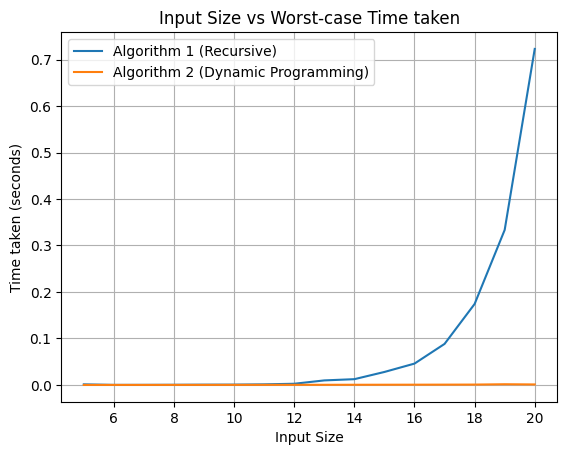

In [16]:
import time
import matplotlib.pyplot as plt

# Generate worst-case scenarios for Algorithm 1
worst_case_sizes = list(range(5, 21))  # Input sizes from 5 to 20
worst_case_times_alg1 = []

for size in worst_case_sizes:
    numbers = list(range(1, size + 1))  # Generate numbers from 1 to size
    target = size * (size + 1) // 2      # Target sum for worst-case scenario
    start_time = time.time()
    issubsetsumrecursive(numbers, len(numbers), target)
    end_time = time.time()
    worst_case_times_alg1.append(end_time - start_time)

# Generate worst-case scenarios for Algorithm 2 (Dynamic programming approach)
worst_case_times_alg2 = []

for size in worst_case_sizes:
    numbers = list(range(1, size + 1))  # Generate numbers from 1 to size
    target = size * (size + 1) // 2      # Target sum for worst-case scenario
    start_time = time.time()
    subsetsum(numbers, target)
    end_time = time.time()
    worst_case_times_alg2.append(end_time - start_time)

# Plotting the graph
plt.plot(worst_case_sizes, worst_case_times_alg1, label='Algorithm 1 (Recursive)')
plt.plot(worst_case_sizes, worst_case_times_alg2, label='Algorithm 2 (Dynamic Programming)')
plt.xlabel('Input Size')
plt.ylabel('Time taken (seconds)')
plt.title('Input Size vs Worst-case Time taken')
plt.legend()
plt.grid(True)
plt.show()
